<a href="https://colab.research.google.com/github/parasgupta1995/Almabetter-Capstone-project/blob/main/_telecom_churn_analysis_almabetter_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Telecom chrun and Region based Division of US state dataframe
df=pd.read_csv('/content/drive/MyDrive/Capstone project data/Python project/Telecom Churn.csv')


In [11]:
#Region of US according to the different state
df2=pd.read_csv('/content/drive/MyDrive/Capstone project data/Python project/Copy of us state list regionwise - us state list regionwise.csv')

In [12]:
df=df.set_index('State').join(df2.set_index('State')).fillna('South')

In [13]:
df.reset_index(level=0, inplace=True)

In [ ]:
df['State'].unique()

In [17]:
df['calls minutes']=df.apply(lambda x: x['Total day minutes']+x['Total eve minutes']+x['Total night minutes']+x['Total intl minutes'],axis=1)

In [16]:
df['Total charge']=df.apply(lambda x: x['Total day charge']+x['Total eve charge']+x['Total night charge']+x['Total intl charge'],axis=1)

In [18]:
df['number of calls']=df.apply(lambda x:x['Total day calls']+x['Total eve calls']+x['Total night calls']+x['Total intl calls']+x['Customer service calls'],axis=1)

In [19]:
df.sort_values(by='State',inplace=True,ignore_index=True)

In [20]:
#dataframe of selected useful data only for calculating number of calls
Number_of_calls_dataframe=df.loc[:,['State', 'Account length', 'International plan', 'Voice mail plan','Number vmail messages', 'Total day calls', 'Total eve calls','Total night calls','Total intl calls', 'Customer service calls']]

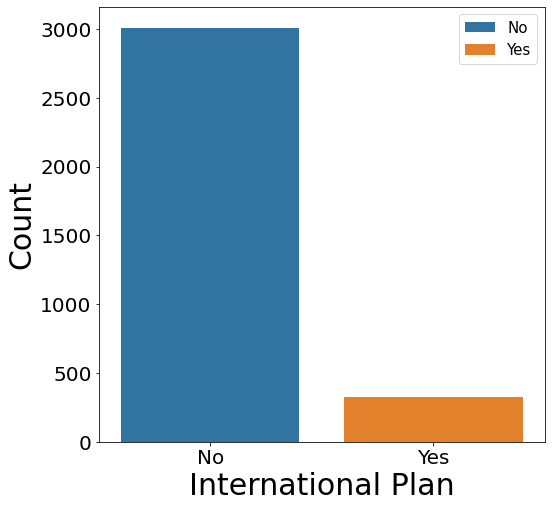

In [21]:
#People with no international plan and still making international calls can be potential customer for International plan
no_intl_plan_making_intlcalls=Number_of_calls_dataframe.groupby(by='International plan')['Account length'].count().reset_index()
plt.figure(figsize=(8,8))
sns.barplot(x='International plan',y='Account length',data=no_intl_plan_making_intlcalls,hue='International plan',dodge=False)
plt.xlabel("International Plan",size=30)
plt.xticks(size=20)
plt.ylabel("Count",size=30)
plt.yticks(size=20)
plt.legend(fontsize=15)

In [22]:
#Total number of call in each State
data_groupby_state_sum=df.groupby('State').sum()['number of calls']

In [23]:
# State with Maximum number of call 
max_call_statewise=data_groupby_state_sum.reset_index()[['number of calls','State']].max()

In [24]:
series_number_of_calls=df.groupby('State').sum().reset_index()[['State','number of calls']].sort_values(by='State').reset_index()

In [25]:
#second dataframe selected parts: 
df2.dropna(inplace=True)
data_regionwise=df2[['Region','State']]
Region_list=list(data_regionwise['Region'].unique())

In [26]:
#Number of calls regionwise dataframe
c=series_number_of_calls.set_index('State').join(df2.set_index('State'))
#one State is left which in south that fillna with south
c.fillna('South')
number_of_calls_regionwise=c.groupby(by='Region').sum().reset_index().drop('index',axis=1).sort_values(by='number of calls')

In [27]:
#Grouped Data(by="State") number of calls made based on day,evening, night, international,service support 
number_of_call_timewise=Number_of_calls_dataframe.groupby(by='State').sum()[['Total day calls', 'Total eve calls','Total night calls','Total intl calls', 'Customer service calls']].sort_values(by='State').reset_index()

In [28]:
#Call number based on Region 
calls_regionwise=number_of_call_timewise.set_index('State').join(df2.set_index('State'))

In [29]:
#Total number of day,evening,night,International,service calls Regionwise
Total_number_of_calls=calls_regionwise.groupby(by='Region').sum()
Total_number_of_calls.reset_index(inplace=True)

In [30]:
size_of=(Total_number_of_calls.shape)

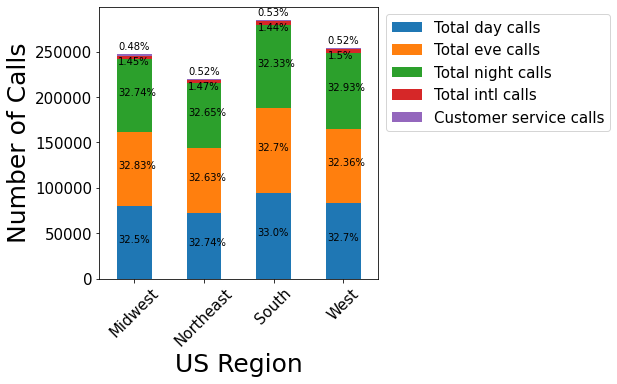

In [31]:
# Graph plot representing the number of day,evening,night,international,customer service call within each region of US

plt.rcParams['figure.figsize']=(5,5)
Total_number_of_calls.plot(x='Region',kind='bar',stacked=True,rot=45,fontsize=15)
plt.xlabel('US Region',fontsize=25)
plt.ylabel('Number of Calls',fontsize=25)
plt.legend(bbox_to_anchor=(1,1),fontsize=15)
column_label=['Total day calls','Total eve calls','Total night calls','Total intl calls','Customer service calls']

for i in range(size_of[0]):
  #Extracting the element at i row and all columns element except region and use sum function to add them
  calls=list(Total_number_of_calls.iloc[i,1:])
  total=int(sum(calls)) #
  y2=0
  
  for j in column_label:
    #number of calls at specified time and region
    number=int(Total_number_of_calls.loc[i,[j]])#
    if j=='Total intl calls':
      y1=y2+number-10000
    elif j=='Customer service calls':
      y1=y2+number+5000
    else:
      y1=number/2+y2
    percent=round(number/total*100,2)
    #Percentage Text in the stack bar plot
    plt.text(x=i-0.23,y=y1,s=f'{percent}%',fontsize=10)
    y2+=number
  


In [ ]:
state_list=list(df['State'].sort_values().unique())
print(state_list)

In [40]:
#Dataframe of deactivated account id
data_for_stop_id=df[df['Churn']==True][['State','Account length','Area code','Customer service calls','Churn']].groupby(by='State')


In [41]:
#dictionary of number of stop using service statewise in which key,values are state name and churn count within state respectively 
list_Account_id_stop=[]
for i in state_list:
  a=list(data_for_stop_id.get_group(i)['Account length'])
  list_Account_id_stop.append(a)
dictionary_state_stop_id=dict(zip(state_list,list_Account_id_stop))


In [42]:
#Number of Customer in each State
number_of_customer_each_state=df[['State']].value_counts().reset_index()
number_of_customer_each_state.rename(columns={0: "Number of customer"},inplace=True)

In [ ]:
#Join the dataframe to number of customer statewise
number_of_customer_each_state.set_index('State').join(df2.set_index('State'))

In [36]:
#Sort the dataframe of number of customer
number_of_customer_each_state.sort_values(by='State',inplace=True)

In [43]:
#Extraction of number chrun customer statewise list:
number_of_churn_statewise=[]
for i in list(df['State'].unique()):
  n=len(dictionary_state_stop_id.get(i))
  number_of_churn_statewise.append(n)


In [44]:
#Creating a dictionary for pandas dataframe of churn customer statewise
dataframe_churn = {"State":state_list, "Number of Churn statewise": number_of_churn_statewise}

In [45]:
#churn customer dataframe
churn_data_statewise=pd.DataFrame(dataframe_churn)

In [46]:
#dataframe of number of customer and churn customer in a State
comparision_data_for_chrun=number_of_customer_each_state.set_index('State').join(churn_data_statewise.set_index('State'))

In [47]:
#index reseting
comparision_data_for_chrun.reset_index(level=0,inplace=True)


In [48]:
# Joining comparision dataframe with df2 to get Region in the dataframe
comparision_data_for_chrun=comparision_data_for_chrun.set_index('State').join(df2.set_index('State'))

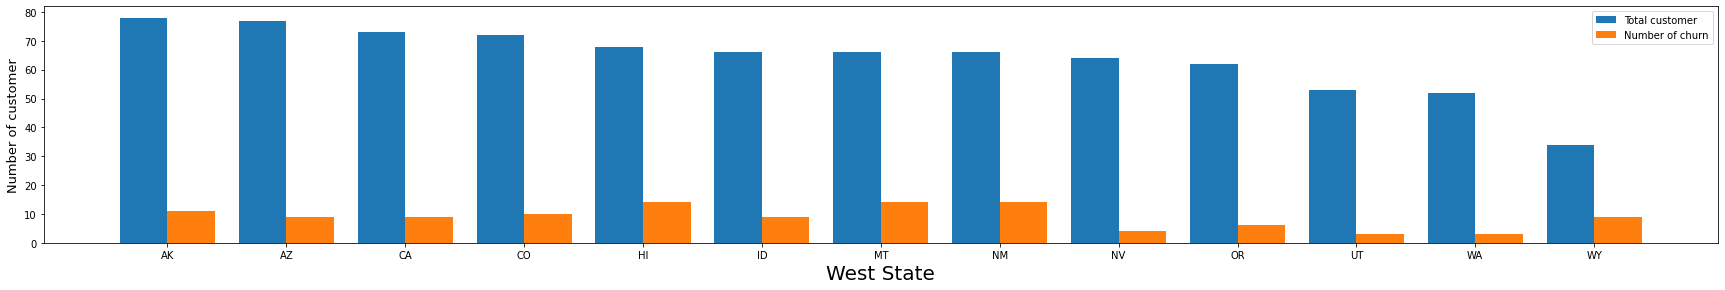

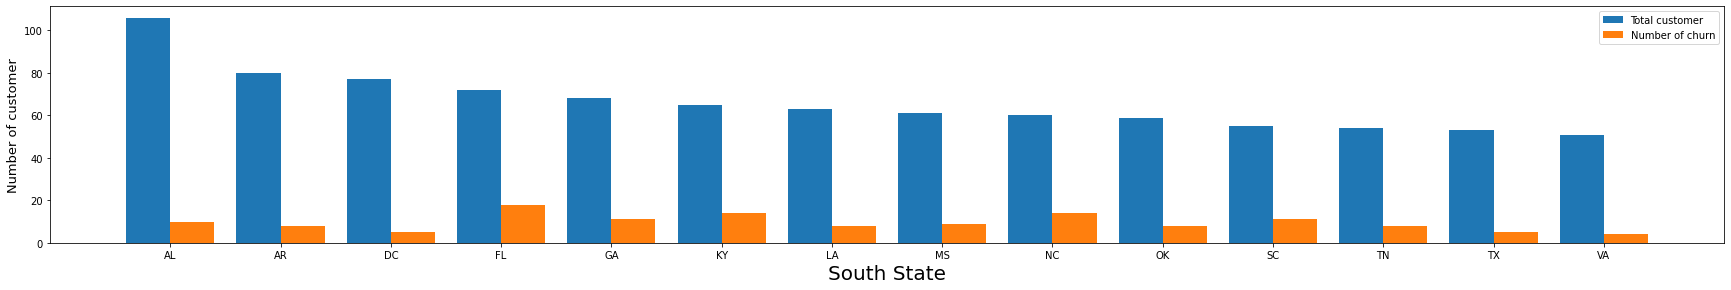

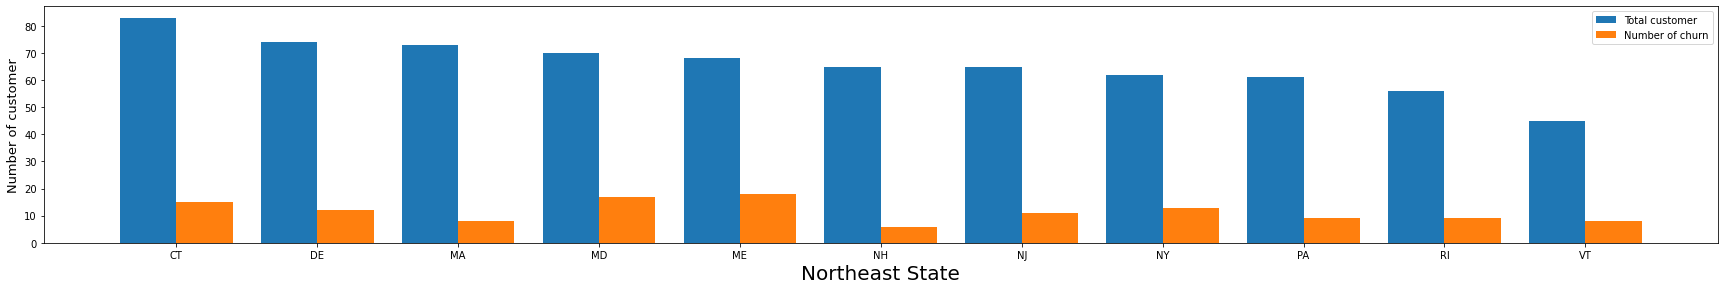

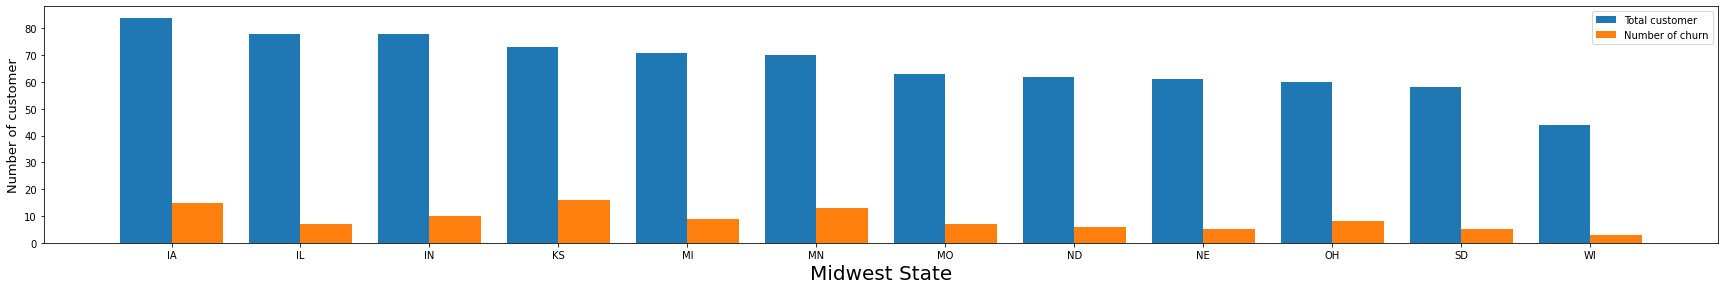

In [49]:
# Looping to plot 4 subplot and plot Total customer and number of chrun customer plot

j=1

for i in df.Region.unique():

  # a=data for x-axis
  xticks_=comparision_data_for_chrun[comparision_data_for_chrun['Region']==i].reset_index(level=0)['State']

  #To draw two bar on same tick first convert x-axis tick to number as they initially are categorical data so np.arange function 
  num_xticks=np.arange(xticks_.nunique())

  #cat-xticks is variable to replace tick by categorical data
  cat_xticks=list(df[df['Region']==i]['State'].unique())
  width=0.4
  heigth_=(comparision_data_for_chrun[comparision_data_for_chrun['Region']==i]['Number of customer'])
  height_1=comparision_data_for_chrun[comparision_data_for_chrun['Region']==i]['Number of Churn statewise']

#Set the figure size
  plt.figure(figsize=(30,20))

#Number of subplot is 4
  plt.subplot(4,1,j)

  plt.bar(num_xticks,heigth_,width,label='Total customer')
  plt.bar(num_xticks+width,height_1,width,label='Number of churn')

  plt.xticks(num_xticks+(width/2),cat_xticks)
  plt.xlabel(f"{i} State",size=20)
  plt.ylabel("Number of customer",size=13)
  plt.legend(bbox_to_anchor=(1,1))

#Increment for the subplot plot number
  j+=1

In [50]:
def charge_per_minute(arg1,arg2):
  '''Function to calculate the charge per minute of the call. arg1 is the total charge while arg2 is the total day in a state'''
  if arg1==0 and arg2==0:
    minute_charge=int(0)
    return minute_charge
  else:
    minute_charge=arg1/arg2
    return minute_charge


In [51]:
#Average Price per minutes for day,eve,night,international calls

df['day charge per minute']=df.apply(lambda x: charge_per_minute(x['Total day charge'],x['Total day minutes']),axis=1)
df['eve charge per minute']=df.apply(lambda x: charge_per_minute(x['Total eve charge'],x['Total eve minutes']),axis=1)
df['night charge per minute']=df.apply(lambda x: charge_per_minute(x['Total night charge'],x['Total night minutes']),axis=1)
df['intl charge per minute']=df.apply(lambda x: charge_per_minute(x['Total intl charge'],x['Total intl minutes']),axis=1)

In [52]:
# data for the calculate selected column only
data_for_mean_max_min=df[['Account length','State','Number vmail messages','day charge per minute','eve charge per minute','night charge per minute','intl charge per minute', 'calls minutes', 'Total charge', 'number of calls','Region',]]

In [59]:
# Use Groupby function to calculate median for Region of US state at the specify column in data_for_mean_max_min
data_median=data_for_mean_max_min.groupby(by=['Region',"State"]).agg('median')[['Account length','day charge per minute','eve charge per minute','night charge per minute','intl charge per minute', 'calls minutes', 'Total charge', 'number of calls']]

In [60]:
plot_data=data_median.loc[('Midwest',),['Account length']].sort_values(by='Account length').reset_index(level=0)

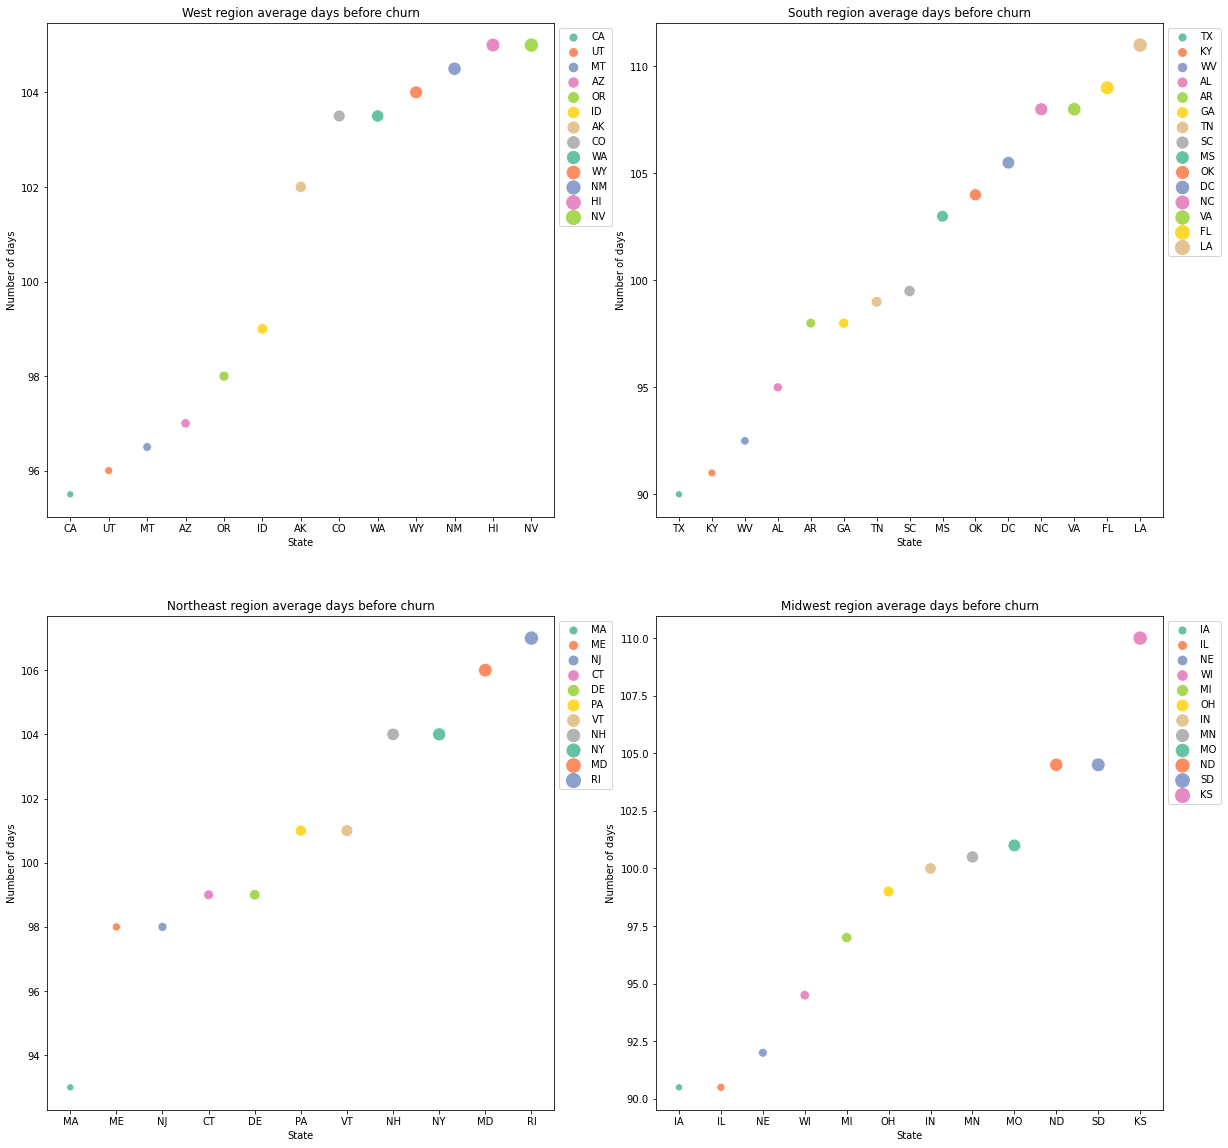

In [61]:
##Code to plot multiple plot for median number of days user use the system
n=df['Region'].nunique()
j=1
plt.figure(figsize=(20,20))
for i in list(df['Region'].unique()):
  plot_data=data_median.loc[(i,),['Account length']].sort_values(by='Account length').reset_index(level=0)
  plt.subplot(n/2,n/2,j)
  sns.scatterplot(x='State',y='Account length',data=plot_data,hue='State',palette='Set2',size='State',sizes=(200,50))
  plt.legend(bbox_to_anchor=(1,1))
  plt.title(label=f'{i} region average days before churn')
  plt.ylabel("Number of days")
  j+=1


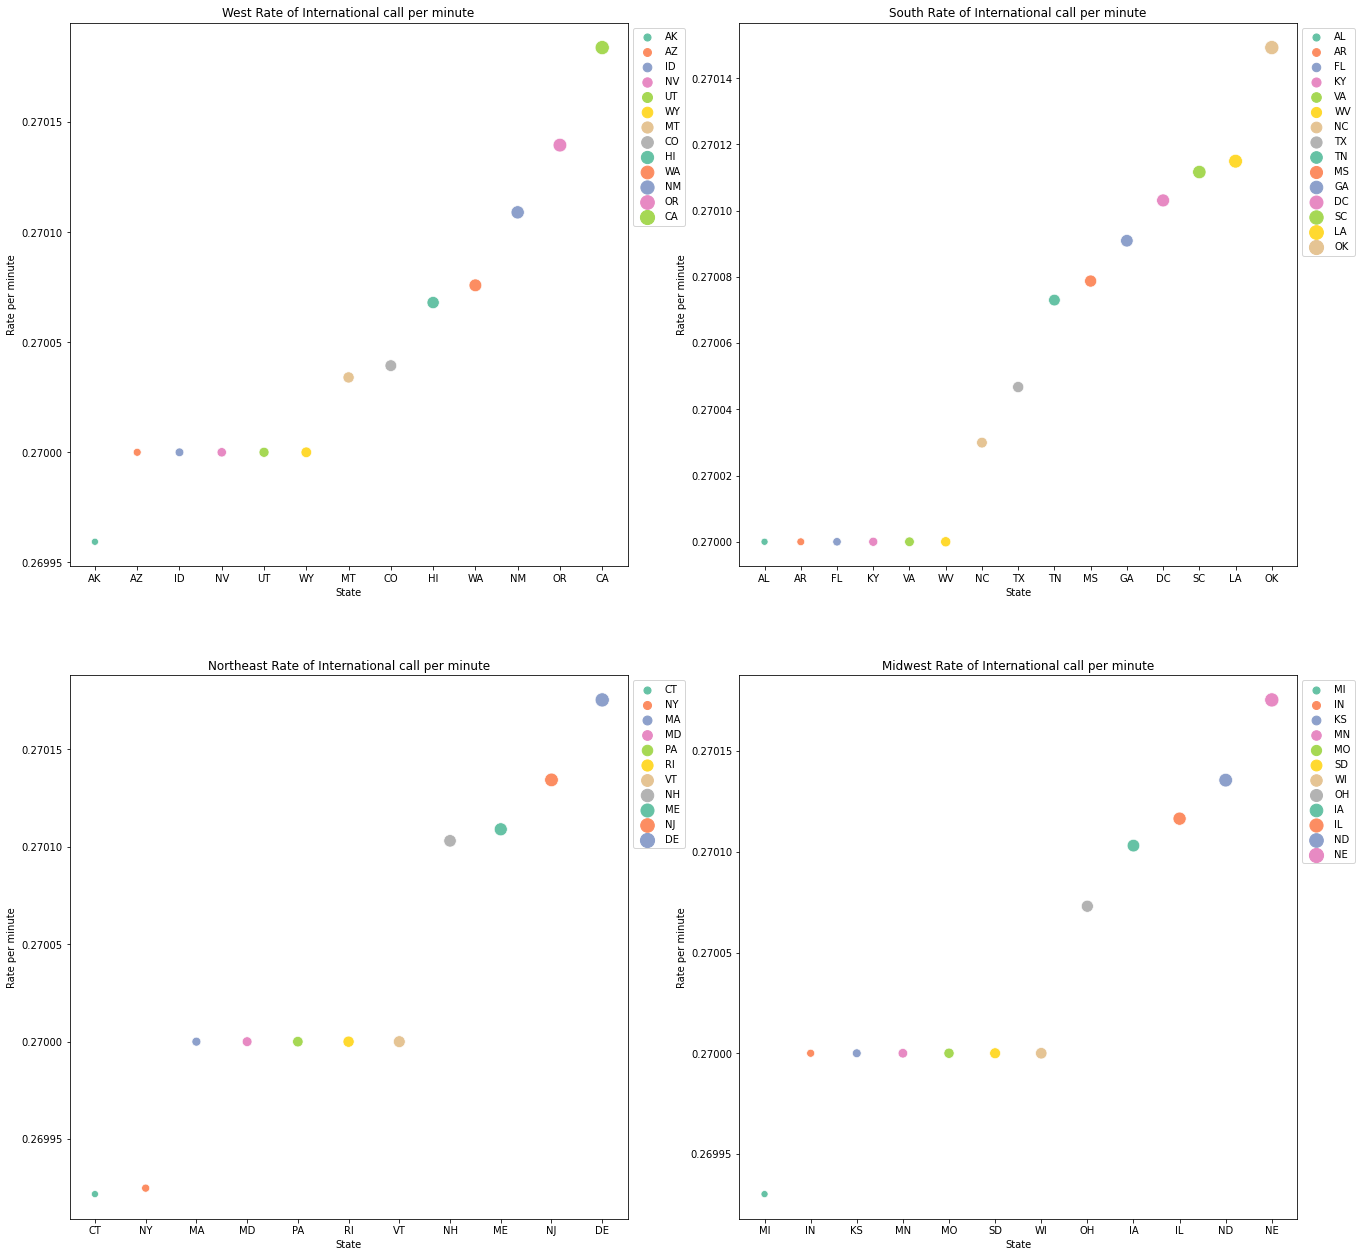

In [62]:
n=df['Region'].nunique()
j=1
plt.figure(figsize=(22,22))
for i in list(df['Region'].unique()):
  plot_data=data_median.loc[(i,),['intl charge per minute']].sort_values(by='intl charge per minute').reset_index(level=0)
  plt.subplot(n/2,n/2,j)
  sns.scatterplot(x='State',y='intl charge per minute',data=plot_data,hue='State',palette='Set2',size='State',sizes=(200,50))
  plt.legend(bbox_to_anchor=(1,1))
  plt.title(label=f'{i} Average Rate of International call per minute')
  plt.ylabel("Rate per minute")
  j+=1

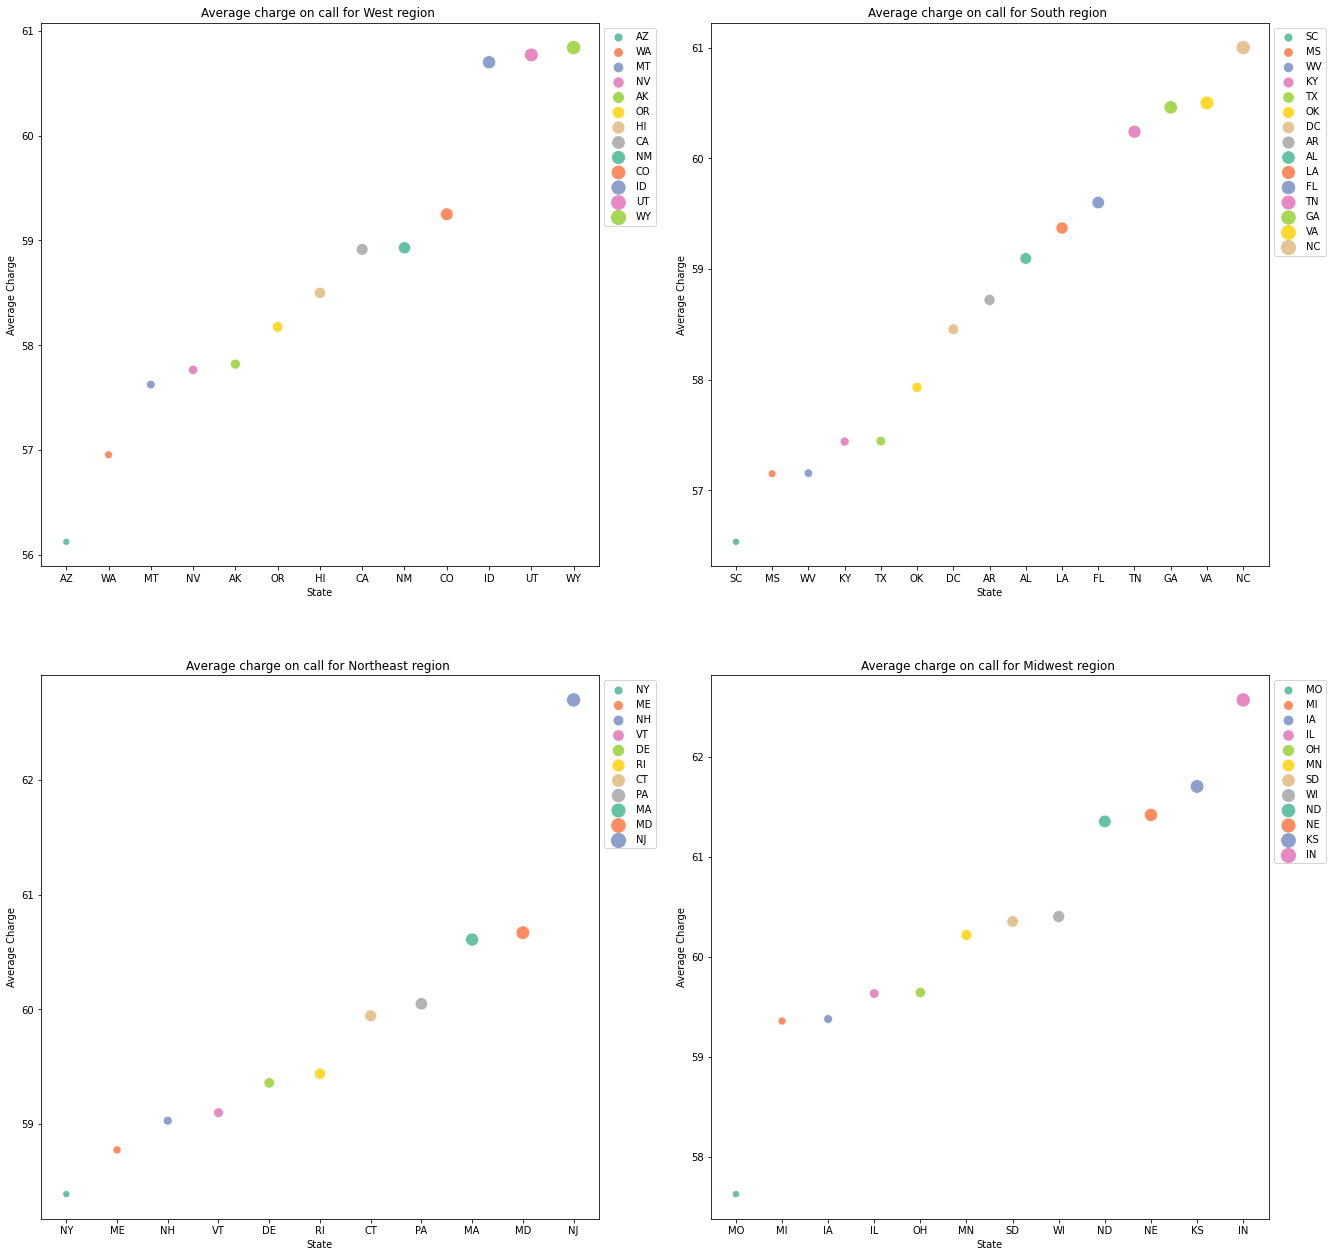

In [63]:
n=df['Region'].nunique()
j=1
plt.figure(figsize=(22,22))
for i in list(df['Region'].unique()):
  plot_data=data_median.loc[(i,),['Total charge']].sort_values(by='Total charge').reset_index(level=0)
  plt.subplot(n/2,n/2,j)
  sns.scatterplot(x='State',y='Total charge',data=plot_data,hue='State',palette='Set2',size='State',sizes=(200,50))
  plt.legend(bbox_to_anchor=(1,1))
  plt.title(label=f'Average charge on call for {i} region ')
  plt.ylabel("Average Charge")
  j+=1

In [107]:
# number of complaint within each State
number_=df[df['Customer service calls']>=1].groupby(by='State')['Customer service calls'].agg(['sum','count'])
number_.rename(columns={'sum':'Total complaint','count':'customer count who complaint'},inplace=True)
number_['Average complaints']=number_.apply(lambda x: x['Total complaint']/x['customer count who complaint'],axis=1)

In [134]:
#Joining the dataframe with df2 so that we can group them based on Region
complaints_data=number_.join(df2.set_index('State')).groupby(by='Region')
# complaints_data=data_number.get_group('West').sort_values(by="Average complaints").reset_index(level=0)

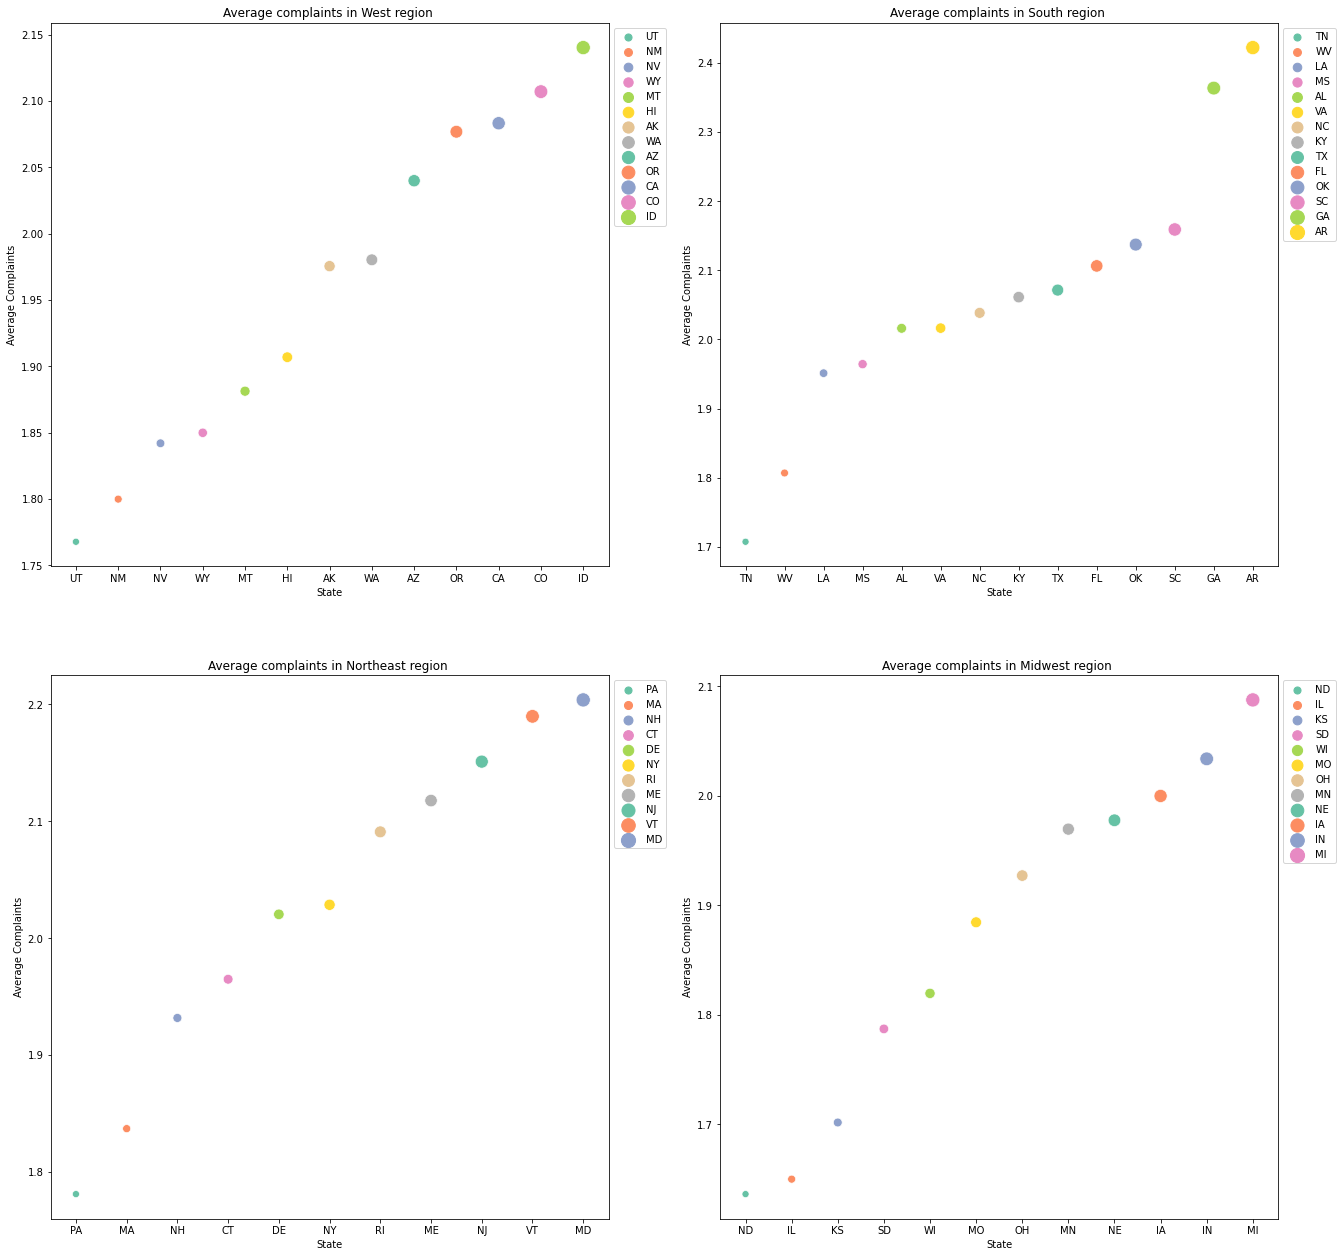

In [135]:
n=df['Region'].nunique()
j=1
plt.figure(figsize=(22,22))
for i in list(df['Region'].unique()):
  plot_data=complaints_data.get_group(i).sort_values(by='Average complaints').reset_index(level=0)
  plt.subplot(n/2,n/2,j)
  sns.scatterplot(x='State',y='Average complaints',data=plot_data,hue='State',palette='Set2',size='State',sizes=(200,50))
  plt.legend(bbox_to_anchor=(1,1))
  plt.title(label=f'Average complaints in {i} region ')
  plt.ylabel("Average Complaints")
  j+=1